#### Chapter 4

In [77]:
from fastai.vision.all import *
from fastbook import *
matplotlib.rc('image',cmap='Greys')

In [3]:
path=untar_data(URLs.MNIST_SAMPLE)
path

Path('/home/imtiaz/.fastai/data/mnist_sample')

In [4]:
Path.BASE_PATH=path

In [5]:
path.ls()

(#3) [Path('labels.csv'),Path('valid'),Path('train')]

In [7]:
(path/'train').ls()

(#2) [Path('train/7'),Path('train/3')]

In [8]:
threes=(path/'train/3').ls().sorted()
sevens=(path/'train/7').ls().sorted()
threes

(#6131) [Path('train/3/10.png'),Path('train/3/10000.png'),Path('train/3/10011.png'),Path('train/3/10031.png'),Path('train/3/10034.png'),Path('train/3/10042.png'),Path('train/3/10052.png'),Path('train/3/1007.png'),Path('train/3/10074.png'),Path('train/3/10091.png')...]

In [9]:
img_path=threes[1]
img=Image.open(img_path)
img

In [11]:
array(img)[4:10,4:10]

array([[  0,   0,   0,   0,   0,   0],
       [  0,   0,   0,   0,   0,  29],
       [  0,   0,   0,  48, 166, 224],
       [  0,  93, 244, 249, 253, 187],
       [  0, 107, 253, 253, 230,  48],
       [  0,   3,  20,  20,  15,   0]], dtype=uint8)

In [12]:
tensor(img)[4:10,4:10]

tensor([[  0,   0,   0,   0,   0,   0],
        [  0,   0,   0,   0,   0,  29],
        [  0,   0,   0,  48, 166, 224],
        [  0,  93, 244, 249, 253, 187],
        [  0, 107, 253, 253, 230,  48],
        [  0,   3,  20,  20,  15,   0]], dtype=torch.uint8)

In [21]:
img_t=tensor(img)
df=pd.DataFrame(img_t)
df.style.background_gradient('Greys')

,0,1,2,3,4,5,6,7,8,9,10,11,12,13,14,15,16,17,18,19,20,21,22,23,24,25,26,27
0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
2,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
3,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
4,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
5,0,0,0,0,0,0,0,0,0,29,150,195,254,255,254,176,193,150,96,0,0,0,0,0,0,0,0,0
6,0,0,0,0,0,0,0,48,166,224,253,253,234,196,253,253,253,253,233,0,0,0,0,0,0,0,0,0
7,0,0,0,0,0,93,244,249,253,187,46,10,8,4,10,194,253,253,233,0,0,0,0,0,0,0,0,0
8,0,0,0,0,0,107,253,253,230,48,0,0,0,0,0,192,253,253,156,0,0,0,0,0,0,0,0,0
9,0,0,0,0,0,3,20,20,15,0,0,0,0,0,43,224,253,245,74,0,0,0,0,0,0,0,0,0


In [23]:
seven_tensors=[tensor(Image.open(o)) for o in sevens]
three_tensors=[tensor(Image.open(o)) for o in threes]
len(seven_tensors),len(three_tensors)

(6265, 6131)

In [25]:
stacked_sevens=torch.stack(seven_tensors).float()/255
stacked_threes=torch.stack(three_tensors).float()/255
stacked_threes.shape

torch.Size([6131, 28, 28])

In [26]:
stacked_threes.ndim # to know the rank of a tensor same as len(stacked_threes.shape)

3

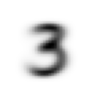

In [28]:
mean3=stacked_threes.mean(0)
show_image(mean3);

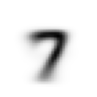

In [29]:
mean7=stacked_sevens.mean(0)
show_image(mean7);

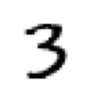

In [31]:
a_3=stacked_threes[1]
show_image(a_3);

In [33]:
dist_3_abs=(a_3-mean3).abs().mean()
dist_3_sqr=((a_3-mean3)**2).mean().sqrt()
dist_3_abs,dist_3_sqr

(tensor(0.1114), tensor(0.2021))

In [36]:
dist_7_abs=(a_3-mean7).abs().mean()
dist_7_sqr=((a_3-mean7)**2).mean().sqrt()
dist_7_abs,dist_7_sqr

(tensor(0.1586), tensor(0.3021))

In [37]:
F.l1_loss(a_3.float(),mean7),F.mse_loss(a_3.float(),mean7).sqrt()

(tensor(0.1586), tensor(0.3021))

In [39]:
data=[[1,2,3],[4,5,6]]
arr=array(data)
tns=tensor(data)

In [40]:
arr

array([[1, 2, 3],
       [4, 5, 6]])

In [41]:
tns

tensor([[1, 2, 3],
        [4, 5, 6]])

In [42]:
tns[1]

tensor([4, 5, 6])

In [43]:
tns[:,1]

tensor([2, 5])

In [47]:
tns[1:,1:3]

tensor([[5, 6]])

In [49]:
tns.type()

'torch.LongTensor'

In [50]:
tns*1.5

tensor([[1.5000, 3.0000, 4.5000],
        [6.0000, 7.5000, 9.0000]])

In [53]:
valid_3_tens=torch.stack([tensor(Image.open(o)) for o in (path/'valid/3').ls()]).float()/255
valid_7_tens=torch.stack([tensor(Image.open(o)) for o in (path/'valid/7').ls()]).float()/255

In [54]:
valid_3_tens.shape, valid_7_tens.shape

(torch.Size([1010, 28, 28]), torch.Size([1028, 28, 28]))

In [55]:
def mnist_distance(a,b):
    return (a-b).abs().mean((-1,-2))
mnist_distance(a_3,mean3)

tensor(0.1114)

In [63]:
(a_3-mean3).abs().mean((-1)).mean(-1)

tensor(0.1114)

In [65]:
valid_3_tens.shape

torch.Size([1010, 28, 28])

In [64]:
mean3.shape

torch.Size([28, 28])

In [66]:
valid_3_dist=mnist_distance(valid_3_tens,mean3)
valid_3_dist,valid_3_dist.shape

(tensor([0.1488, 0.1145, 0.1158,  ..., 0.1129, 0.1419, 0.1669]),
 torch.Size([1010]))

In [67]:
tensor([1,2,3])+tensor(1)

tensor([2, 3, 4])

In [69]:
tensor([1,2,3]).shape,tensor(1).shape


(torch.Size([3]), torch.Size([]))

In [71]:
def is_3(x):return mnist_distance(x,mean3)<mnist_distance(x,mean7)
is_3(a_3)

tensor(True)

In [72]:
is_3(valid_3_tens)

tensor([True, True, True,  ..., True, True, True])

In [75]:
accuracy_3s=is_3(valid_3_tens).float().mean()
accuracy_7s=(1-is_3(valid_7_tens).float()).mean()
accuracy_3s,accuracy_7s

(tensor(0.9168), tensor(0.9854))

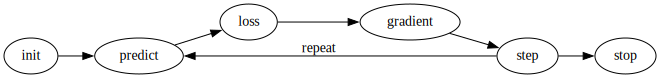

In [78]:
gv('''
init->predict->loss->gradient->step->stop
step->predict[label=repeat]
''')

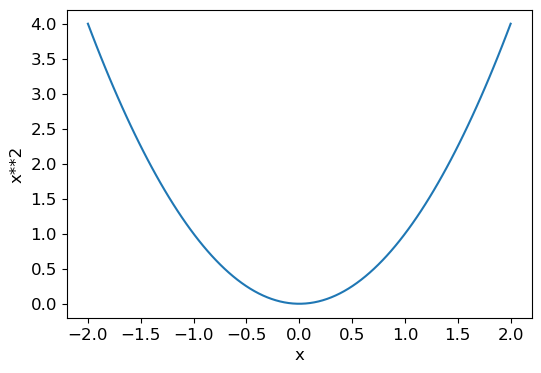

In [79]:
def f(x): return x**2
plot_function(f,'x','x**2')

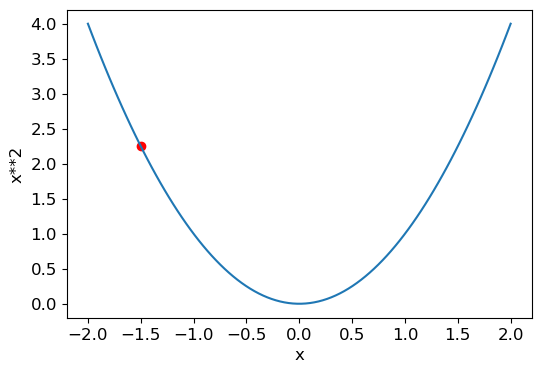

In [81]:
plot_function(f,'x','x**2')
plt.scatter(-1.5,f(-1.5),color='red')

In [88]:
xt=tensor(3.).requires_grad_()
xt

tensor(3., requires_grad=True)

In [89]:
yt=f(xt)

In [90]:
yt

tensor(9., grad_fn=<PowBackward0>)

In [91]:
yt.backward()  # the thing on which you call backward , you get the partial derivative on that for example x.grad means dy/dx

In [92]:
xt.grad

tensor(6.)

In [96]:
xt=tensor([3.,4.,10.]).requires_grad_()
xt

tensor([ 3.,  4., 10.], requires_grad=True)

In [98]:
def f(x):return (x**2).sum()

In [99]:
yt=f(xt)

In [100]:
yt.backward()  # the thing on which you call backward , you get the partial derivative on that for example x.grad means dy/dx

In [101]:
xt.grad

tensor([ 6.,  8., 20.])

In [124]:
time=torch.arange(20) ;time

tensor([ 0,  1,  2,  3,  4,  5,  6,  7,  8,  9, 10, 11, 12, 13, 14, 15, 16, 17, 18, 19])

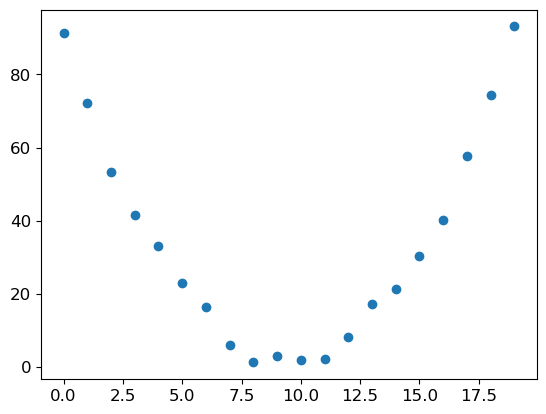

In [125]:
speed=torch.randn(20)*3 + (time-9.5)**2 + 1
plt.scatter(time,speed)

In [126]:
def f(t,params):
    a,b,c = params
    return a*(t**2) + b*t + c

In [127]:
def mse(preds,targets):
    return ((preds-targets)**2).mean()

In [128]:
params=torch.randn(3).requires_grad_()

In [129]:
orig_params=params.clone()
orig_params

tensor([ 0.9912, -0.5672, -0.5706], grad_fn=<CloneBackward0>)

In [130]:
preds=f(time,params)
preds

tensor([-5.7065e-01, -1.4659e-01,  2.2599e+00,  6.6490e+00,  1.3020e+01,  2.1374e+01,  3.1711e+01,  4.4030e+01,  5.8331e+01,  7.4615e+01,  9.2881e+01,  1.1313e+02,  1.3536e+02,  1.5958e+02,
         1.8577e+02,  2.1395e+02,  2.4411e+02,  2.7626e+02,  3.1038e+02,  3.4649e+02], grad_fn=<AddBackward0>)

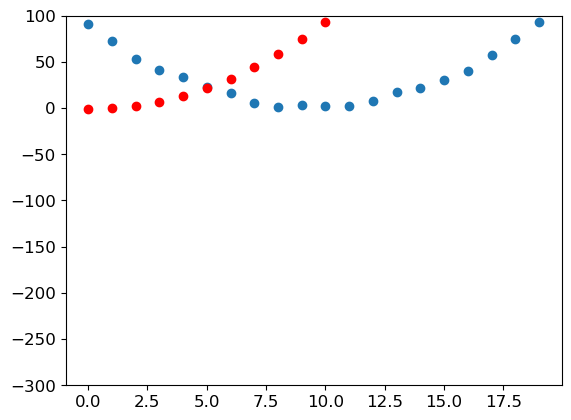

In [131]:
def show_preds(preds,ax=None):
    if ax is None : ax=plt.subplots()[1]
    ax.scatter(time,speed)
    ax.scatter(time, to_np(preds),color='red')
    ax.set_ylim(-300,100)
    
show_preds(preds)

In [132]:
loss=mse(preds,speed)
loss

tensor(17758.2695, grad_fn=<MeanBackward0>)

In [133]:
loss.backward()
params.grad
params.grad* 1e-5
params

tensor([ 0.9912, -0.5672, -0.5706], requires_grad=True)

In [134]:
lr=1e-5
params.data-=lr*params.grad.data
params.grad=None

In [135]:
preds=f(time,params)

In [136]:
mse(preds,speed)

tensor(4265.5791, grad_fn=<MeanBackward0>)

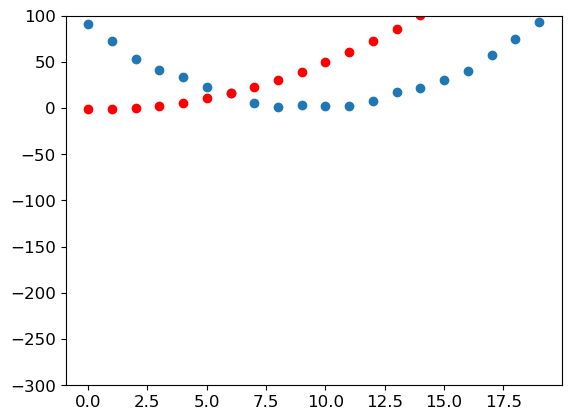

In [137]:
show_preds(preds)

In [138]:
def apply_step(params,prn=True):
    preds=f(time,params)
    loss=mse(preds,speed)
    loss.backward()
    params.data-=params.grad.data*1e-5
    params.grad=None
    if prn:
        print(loss.item())
    return preds

for i in range(10): apply_step(params)

4265.5791015625
1712.344482421875
1229.188232421875
1137.7545166015625
1120.446533203125
1117.1656494140625
1116.5389404296875
1116.41455078125
1116.385009765625
1116.373779296875


In [139]:
params=orig_params.detach().requires_grad_()

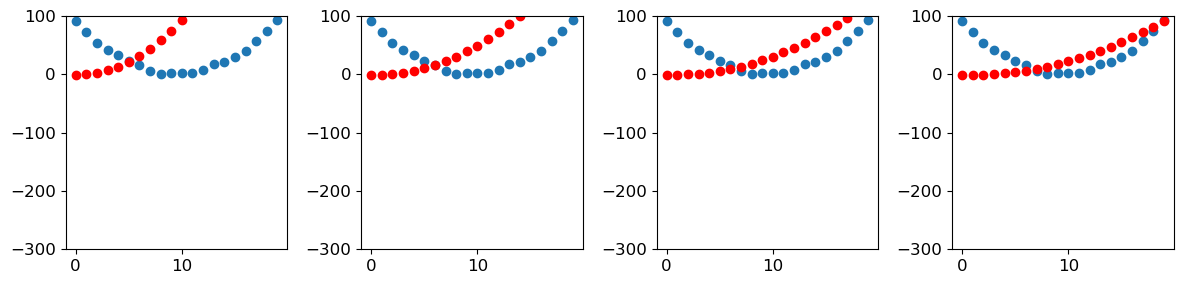

In [140]:
_,axs=plt.subplots(1,4, figsize=(12,3))
for ax in axs: show_preds(apply_step(params,False),ax)
plt.tight_layout()

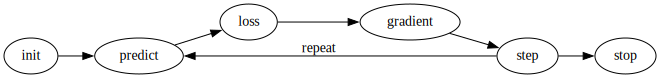

In [141]:
gv('''
init->predict->loss->gradient->step->stop
step->predict[label=repeat]
''')

In [142]:
train_x=torch.cat([stacked_threes,stacked_sevens]).view(-1,28*28)
train_x.shape

torch.Size([12396, 784])

In [144]:
train_y=tensor([1]*len(threes) + [0]*len(sevens)).unsqueeze(1)
train_y.shape

torch.Size([12396, 1])

In [146]:
dset=list(zip(train_x,train_y))
x,y=dset[0]
x.shape,y.shape

(torch.Size([784]), torch.Size([1]))

In [148]:
valid_x=torch.cat([valid_3_tens,valid_7_tens]).view(-1,28*28)
valid_y=tensor([1]*len(valid_3_tens) + [0]*len(valid_7_tens))
valid_x.shape,valid_y.shape
valid_dset=list(zip(valid_x,valid_y))

In [149]:
def init_params(size,std=1.0): return (torch.randn(size)*std).requires_grad_()
weights=init_params((28*28,1))
bias=init_params(1)

In [155]:
train_x[0].shape,weights.shape,bias.shape

(torch.Size([784]), torch.Size([784, 1]), torch.Size([1]))

In [152]:
(train_x[0]*weights.T).sum()+bias

tensor([1.0061], grad_fn=<AddBackward0>)

In [153]:
(train_x[0]@weights).sum()+bias

tensor([1.0061], grad_fn=<AddBackward0>)

In [160]:
def linear1(xb): return xb@weights + bias
preds=linear1(train_x)
preds

tensor([[1.0061],
        [1.5329],
        [9.5779],
        ...,
        [6.2636],
        [6.9246],
        [8.8002]], grad_fn=<AddBackward0>)

In [161]:
corrects=(preds>0.0).float() == train_y
corrects.float().mean()

tensor(0.4837)

In [168]:
help(torch.where)

Help on built-in function where in module torch:

where(...)
    where(condition, x, y) -> Tensor
    
    Return a tensor of elements selected from either :attr:`x` or :attr:`y`, depending on :attr:`condition`.
    
    The operation is defined as:
    
    .. math::
        \text{out}_i = \begin{cases}
            \text{x}_i & \text{if } \text{condition}_i \\
            \text{y}_i & \text{otherwise} \\
        \end{cases}
    
    .. note::
        The tensors :attr:`condition`, :attr:`x`, :attr:`y` must be :ref:`broadcastable <broadcasting-semantics>`.
    
    Arguments:
        condition (BoolTensor): When True (nonzero), yield x, otherwise yield y
        x (Tensor or Scalar): value (if :attr:`x` is a scalar) or values selected at indices
                              where :attr:`condition` is ``True``
        y (Tensor or Scalar): value (if :attr:`y` is a scalar) or values selected at indices
                              where :attr:`condition` is ``False``
    
    Returns:


In [172]:
trgts  = tensor([1.0,0.0,1.0])
prds   = tensor([0.9, 0.4, 0.2])

def mnist_loss(prds,trgts): return torch.where(trgts==1,1-prds,prds).mean()
mnist_loss(prds,trgts)

tensor(0.4333)

In [170]:
torch.where(trgts==1, 1-prds, prds)

tensor([0.1000, 0.4000, 0.8000])

In [171]:
torch.where(trgts==1, 1-prds, prds).mean()

tensor(0.4333)

In [174]:
mnist_loss(tensor([0.9, 0.4, 0.8]),trgts) # loss decreases here since we made the last value close to 1.

tensor(0.2333)

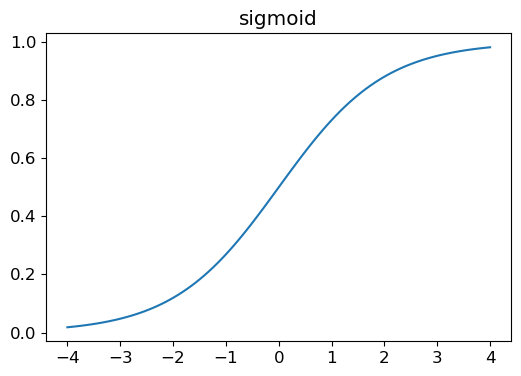

In [176]:
plot_function(torch.sigmoid,title='sigmoid',min=-4 , max=4)

In [177]:
def mnist_loss(prds,trgts):
    prds=torch.sigmoid(prds)
    return torch.where(trgts==1,1-prds,prds).mean()

mnist_loss(prds,trgts)

tensor(0.4460)

In [180]:
coll=range(15)
dl=DataLoader(coll,batch_size=5,shuffle=True)
list(dl)

[tensor([14,  9,  7,  0, 12]),
 tensor([ 6, 11,  4,  2,  8]),
 tensor([ 5,  3,  1, 13, 10])]

In [183]:
ds=L(enumerate(string.ascii_lowercase))

In [184]:
ds

(#26) [(0, 'a'),(1, 'b'),(2, 'c'),(3, 'd'),(4, 'e'),(5, 'f'),(6, 'g'),(7, 'h'),(8, 'i'),(9, 'j')...]

In [185]:
dl=DataLoader(ds,batch_size=6,shuffle=True)
list(dl)

[(tensor([20,  8,  2,  5, 12, 17]), ('u', 'i', 'c', 'f', 'm', 'r')),
 (tensor([19, 14, 15, 16, 11,  1]), ('t', 'o', 'p', 'q', 'l', 'b')),
 (tensor([23, 25,  0, 22,  6,  4]), ('x', 'z', 'a', 'w', 'g', 'e')),
 (tensor([ 3, 21, 24, 18,  9,  7]), ('d', 'v', 'y', 's', 'j', 'h')),
 (tensor([10, 13]), ('k', 'n'))]

In [186]:
# putting all concepts together here
weights=init_params((784,1))
bias=init_params(1)

In [187]:
dl=DataLoader(dset,batch_size=256)
xb,yb=first(dl)
xb.shape,yb.shape

(torch.Size([256, 784]), torch.Size([256, 1]))

In [188]:
valid_dl=DataLoader(valid_dset,batch_size=256)

In [190]:
# lets create a minibatch of size 4 for testing
batch=train_x[:4]
batch.shape

torch.Size([4, 784])

In [202]:
preds=linear1(batch)
preds

tensor([[-10.7397],
        [ -7.6684],
        [ -6.3949],
        [ -9.8102]], grad_fn=<AddBackward0>)

In [194]:
loss=mnist_loss(preds,train_y[:4])
print(loss.item())
loss.backward()

0.9994472861289978


In [196]:
def calc_grad(xb,yb,model):
    preds=model(xb)
    loss=mnist_loss(preds,yb)
    loss.backward()

In [197]:
calc_grad(train_x[:4],train_y[:4],linear1)
weights.grad.mean(),bias.grad

(tensor(-0.0002), tensor([-0.0011]))

In [198]:
calc_grad(train_x[:4],train_y[:4],linear1)
weights.grad.mean(),bias.grad

(tensor(-0.0002), tensor([-0.0017]))

In [199]:
weights.grad.zero_()
bias.grad.zero_()

tensor([0.])

In [200]:
def train_epoch(model,lr,params):
    for xb,yb in dl:
        calc_grad(xb,yb,model)
        for p in params:
            p.data-=lr*p.grad.data
            p.grad.zero_()

In [203]:
(preds>0.0).float()==train_y[:4]

tensor([[False],
        [False],
        [False],
        [False]])

In [208]:
def batch_accuracy(xb,yb):
    preds=xb.sigmoid()
    correct=(preds>0.5).float()==yb
    return correct.float().mean()

In [209]:
batch_accuracy(linear1(batch), train_y[:4])

tensor(0.)

In [215]:
def validate_epoch(model):
    accs=[batch_accuracy(model(xb),yb) for xb,yb in valid_dl]
    return round(torch.stack(accs).mean().item(),4)

In [216]:
validate_epoch(linear1)

0.4856

In [217]:
lr=1.
params=weights,bias
train_epoch(linear1,lr,params)
validate_epoch(linear1)

0.6618

In [218]:
for i in range(20):
    train_epoch(linear1,lr,params)
    print(validate_epoch(linear1),end=' ')

0.8487 0.8992 0.9239 0.9332 0.9398 0.9451 0.949 0.95 0.9523 0.9533 0.9538 0.9558 0.9571 0.9576 0.958 0.959 0.9595 0.96 0.96 0.9605 

In [219]:
linear_model=nn.Linear(28*28,1)
w,b=linear_model.parameters()
w.shape,b.shape

(torch.Size([1, 784]), torch.Size([1]))

In [222]:
class BasicOptim:
    def __init__(self,params,lr):self.params,self.lr=list(params),lr
    def step(self,*args,**kwargs):
        for p in self.params : p.data-=self.lr * p.grad.data
    def zero_grad(self,*args,**kwargs):
        for p in self.params:p.grad=None
        

In [223]:
opt=BasicOptim(linear_model.parameters(),lr)

In [226]:
def train_epoch(model):
    for xb,yb in dl:
        calc_grad(xb,yb,model)
        opt.step()
        opt.zero_grad()

In [227]:
validate_epoch(linear_model)

0.4557

In [228]:
def train_model(model,epochs):
    for i in range(epochs):
        train_epoch(model)
        print(validate_epoch(linear_model),end=' ')
        
train_model(linear_model,20)

0.4932 0.8124 0.8343 0.9019 0.9218 0.9356 0.9442 0.9513 0.9532 0.9562 0.958 0.9599 0.9624 0.9628 0.9638 0.9647 0.9652 0.9652 0.9661 0.9665 

In [230]:
#fastai provides sgd class which we can use instead of basicoptim class
linear_model=nn.Linear(28*28,1)
opt=SGD(linear_model.parameters(),lr)
train_model(linear_model,20)

0.4932 0.8713 0.8147 0.9 0.9213 0.9341 0.9432 0.9494 0.9532 0.9547 0.9566 0.9585 0.9604 0.9628 0.9633 0.9643 0.9652 0.9656 0.9656 0.9665 

In [231]:
dls=DataLoaders(dl,valid_dl)

In [232]:
learn=Learner(dls,nn.Linear(28*28,1),opt_func=SGD,
             loss_func=mnist_loss,metrics=batch_accuracy)
learn.fit(10,lr=lr)

epoch,train_loss,valid_loss,batch_accuracy,time
0,0.637270,0.503604,0.495584,00:00
1,0.581539,0.136668,0.903781,00:00
2,0.210858,0.217600,0.793939,00:00
3,0.091087,0.126149,0.895654,00:00
4,0.047027,0.093382,0.919437,00:00
5,0.029922,0.076464,0.932363,00:00
6,0.022947,0.066118,0.941962,00:00
7,0.019895,0.059334,0.949706,00:00
8,0.018384,0.054634,0.953033,00:00
9,0.017498,0.051208,0.954996,00:00


In [233]:
def simple_net(xb):
    res=xb@w1 + b1
    res=res.max(tensor(0.0))
    res=res@w2+b2
    return res

In [237]:
test=(torch.randn(3)+0.3)
print(test)
test.max(tensor(0.0)) # replace all negative numbers with zero which is called rectified linear unit.

tensor([-0.4169,  0.8315, -1.2288])


tensor([0.0000, 0.8315, 0.0000])

In [238]:
w1=init_params(28*28,30)
b1=init_params(30)
w2=init_params(30,1)
b2=init_params(1)

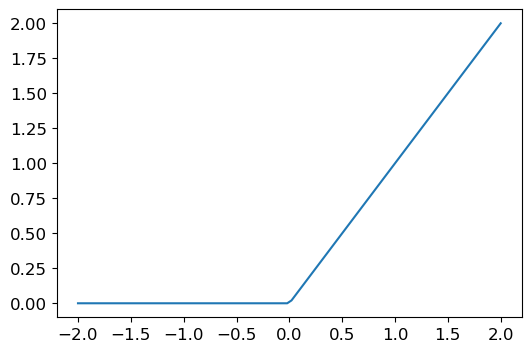

In [239]:
plot_function(F.relu)

In [241]:
simple_net=nn.Sequential(
    nn.Linear(28*28,30),
    nn.ReLU(),
    nn.Linear(30,1))

simple_net

Sequential(
  (0): Linear(in_features=784, out_features=30, bias=True)
  (1): ReLU()
  (2): Linear(in_features=30, out_features=1, bias=True)
)

In [242]:
learn=Learner(dls,simple_net,opt_func=SGD,loss_func=mnist_loss,metrics=batch_accuracy)
learn.fit(40,0.1)

epoch,train_loss,valid_loss,batch_accuracy,time
0,0.322542,0.419942,0.504853,00:00
1,0.151283,0.241077,0.787828,00:00
2,0.083414,0.127580,0.903398,00:00
3,0.054581,0.090128,0.927180,00:00
4,0.041232,0.073103,0.942069,00:00
5,0.034423,0.063516,0.951615,00:00
6,0.030519,0.057461,0.953087,00:00
7,0.027989,0.053332,0.954505,00:00
8,0.026167,0.050336,0.955923,00:00
9,0.024758,0.048051,0.957342,00:00


In [245]:
L(learn.recorder.values).itemgot(2)

(#40) [0.5048531293869019,0.7878281474113464,0.9033979177474976,0.9271804690361023,0.942069411277771,0.9516146183013916,0.9530866742134094,0.9545050263404846,0.9559233784675598,0.957341730594635...]

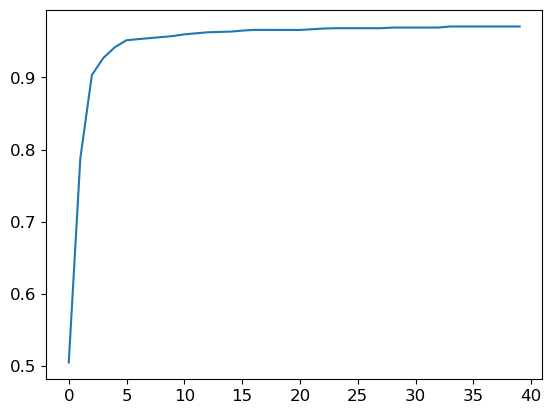

In [246]:
plt.plot(L(learn.recorder.values).itemgot(2));

In [247]:
learn.recorder.values[-1][2]

0.970651388168335

In [250]:
dls = ImageDataLoaders.from_folder(path)
learn = vision_learner(dls, resnet18, pretrained=False,
                    loss_func=F.cross_entropy, metrics=accuracy)
learn.fit_one_cycle(1, 0.1)

epoch,train_loss,valid_loss,accuracy,time
0,0.122703,0.021180,0.995093,00:08


#### chapter 5

In [18]:
from fastai.vision.all import *
from fastbook import *
path=untar_data(URLs.PETS)
path

Path('.')

In [2]:
Path.BASE_PATH=path

In [3]:
path.ls()

(#2) [Path('annotations'),Path('images')]

In [4]:
(path/'images').ls()

(#7393) [Path('images/Birman_115.jpg'),Path('images/leonberger_142.jpg'),Path('images/Bombay_68.jpg'),Path('images/japanese_chin_26.jpg'),Path('images/saint_bernard_149.jpg'),Path('images/Ragdoll_41.jpg'),Path('images/japanese_chin_32.jpg'),Path('images/Ragdoll_68.jpg'),Path('images/Persian_202.jpg'),Path('images/scottish_terrier_143.jpg')...]

In [5]:
fname=(path/'images').ls()[0]
fname

Path('images/Birman_115.jpg')

In [6]:
fname.name

'Birman_115.jpg'

In [7]:
re.findall(r'(.+)_\d+.jpg$',fname.name)

['Birman']

In [8]:
pets=DataBlock(
              blocks=(ImageBlock,CategoryBlock),
              get_items=get_image_files,
              splitter=RandomSplitter(seed=42),
              get_y=using_attr(RegexLabeller(r'(.+)_\d+.jpg$'),'name'),
              item_tfms=Resize(460),
              batch_tfms=aug_transforms(size=224,min_scale=0.75))

dls=pets.dataloaders(path/'images')

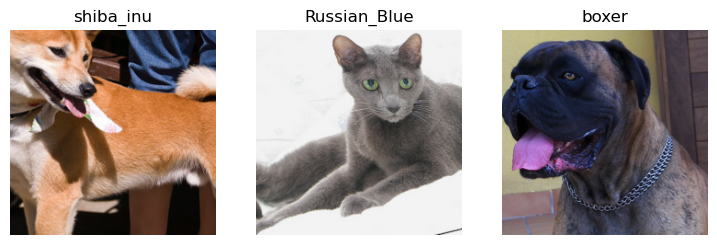

In [9]:
dls.show_batch(nrows=1,ncols=3)

In [10]:
pets.summary(path/'images')

Setting-up type transforms pipelines
Found 7390 items
2 datasets of sizes 5912,1478
Setting up Pipeline: PILBase.create
Setting up Pipeline: partial -> Categorize -- {'vocab': None, 'sort': True, 'add_na': False}

Building one sample
  Pipeline: PILBase.create
    starting from
      /home/imtiaz/.fastai/data/oxford-iiit-pet/images/newfoundland_139.jpg
    applying PILBase.create gives
      PILImage mode=RGB size=500x333
  Pipeline: partial -> Categorize -- {'vocab': None, 'sort': True, 'add_na': False}
    starting from
      /home/imtiaz/.fastai/data/oxford-iiit-pet/images/newfoundland_139.jpg
    applying partial gives
      newfoundland
    applying Categorize -- {'vocab': None, 'sort': True, 'add_na': False} gives
      TensorCategory(27)

Final sample: (PILImage mode=RGB size=500x333, TensorCategory(27))


Found 7390 items
2 datasets of sizes 5912,1478
Setting up Pipeline: PILBase.create
Setting up Pipeline: partial -> Categorize -- {'vocab': None, 'sort': True, 'add_na': False}

In [11]:
learn=vision_learner(dls,resnet34,metrics=error_rate)
learn.fine_tune(2)

/home/imtiaz/mambaforge/lib/python3.9/site-packages/torchvision/models/_utils.py:208: UserWarning: The parameter 'pretrained' is deprecated since 0.13 and will be removed in 0.15, please use 'weights' instead.
  warnings.warn(
/home/imtiaz/mambaforge/lib/python3.9/site-packages/torchvision/models/_utils.py:223: UserWarning: Arguments other than a weight enum or `None` for 'weights' are deprecated since 0.13 and will be removed in 0.15. The current behavior is equivalent to passing `weights=ResNet34_Weights.IMAGENET1K_V1`. You can also use `weights=ResNet34_Weights.DEFAULT` to get the most up-to-date weights.
  warnings.warn(msg)


epoch,train_loss,valid_loss,error_rate,time
0,1.508511,0.308830,0.110284,01:08


epoch,train_loss,valid_loss,error_rate,time
0,0.501993,0.286218,0.095399,00:35
1,0.316902,0.217901,0.066982,00:34


In [12]:
x,y=dls.one_batch()

In [13]:
y

TensorCategory([30,  5,  6, 15, 35, 23, 34, 33, 28, 24,  2, 32,  0, 25,  1, 25,
                21, 10, 19, 20, 28, 28, 17, 15, 17,  6, 36,  3,  9,  6,  4, 36,
                 2, 20, 16,  0, 21, 17, 27, 14, 32, 14,  6, 29, 22, 35, 10, 17,
                 6,  1, 26, 19, 20, 31,  8,  2, 17, 28, 11, 25, 21, 11,  9, 33],
               device='cuda:0')

In [14]:
preds,_=learn.get_preds(dl=[(x,y)])
preds[0]

TensorBase([3.2168e-04, 1.6719e-04, 1.2280e-03, 2.6557e-04, 2.6241e-03,
            1.5774e-03, 4.4456e-04, 9.5489e-04, 2.5789e-03, 1.5124e-03,
            3.6692e-04, 5.1384e-05, 1.7216e-02, 2.4271e-03, 5.6762e-03,
            7.6929e-04, 4.5871e-04, 8.1661e-05, 1.1879e-02, 5.8773e-03,
            3.6528e-04, 2.3737e-02, 4.5778e-02, 3.6332e-02, 3.2738e-03,
            4.8344e-04, 2.4712e-04, 5.2072e-02, 1.3246e-04, 1.1436e-03,
            7.3560e-01, 1.3168e-02, 1.0835e-03, 4.3570e-04, 2.4487e-02,
            4.5099e-03, 6.7311e-04])

In [15]:
len(preds[0]),preds[0].sum()

(37, TensorBase(1.0000))

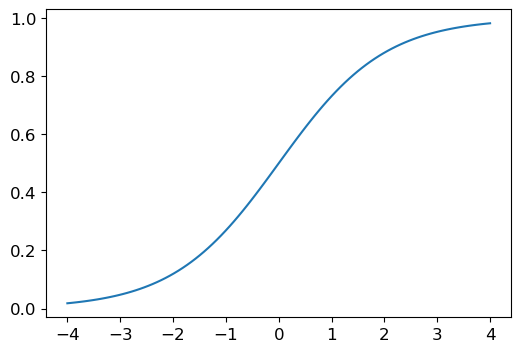

In [19]:
plot_function(torch.sigmoid,min=-4 , max=4)

In [20]:
torch.random.manual_seed(42);

In [21]:
acts = torch.randn((6,2))*2
acts

tensor([[ 0.6734,  0.2576],
        [ 0.4689,  0.4607],
        [-2.2457, -0.3727],
        [ 4.4164, -1.2760],
        [ 0.9233,  0.5347],
        [ 1.0698,  1.6187]])

In [22]:
sm_acts=torch.softmax(acts,dim=1)
sm_acts

tensor([[0.6025, 0.3975],
        [0.5021, 0.4979],
        [0.1332, 0.8668],
        [0.9966, 0.0034],
        [0.5959, 0.4041],
        [0.3661, 0.6339]])

In [23]:
targ=tensor([0,1,0,1,1,0])

In [24]:
idx=range(6)
sm_acts[idx,targ]

tensor([0.6025, 0.4979, 0.1332, 0.0034, 0.4041, 0.3661])

In [25]:
F.nll_loss(sm_acts,targ,reduction='none')

tensor([-0.6025, -0.4979, -0.1332, -0.0034, -0.4041, -0.3661])

In [26]:
-torch.log(sm_acts[idx,targ])

tensor([0.5067, 0.6973, 2.0160, 5.6958, 0.9062, 1.0048])

In [27]:
F.nll_loss(torch.log(sm_acts),targ,reduction='none')

tensor([0.5067, 0.6973, 2.0160, 5.6958, 0.9062, 1.0048])

In [28]:
loss_func=nn.CrossEntropyLoss()
loss_func(acts,targ)

tensor(1.8045)

In [29]:
nn.CrossEntropyLoss(reduction='none')(acts, targ)

tensor([0.5067, 0.6973, 2.0160, 5.6958, 0.9062, 1.0048])

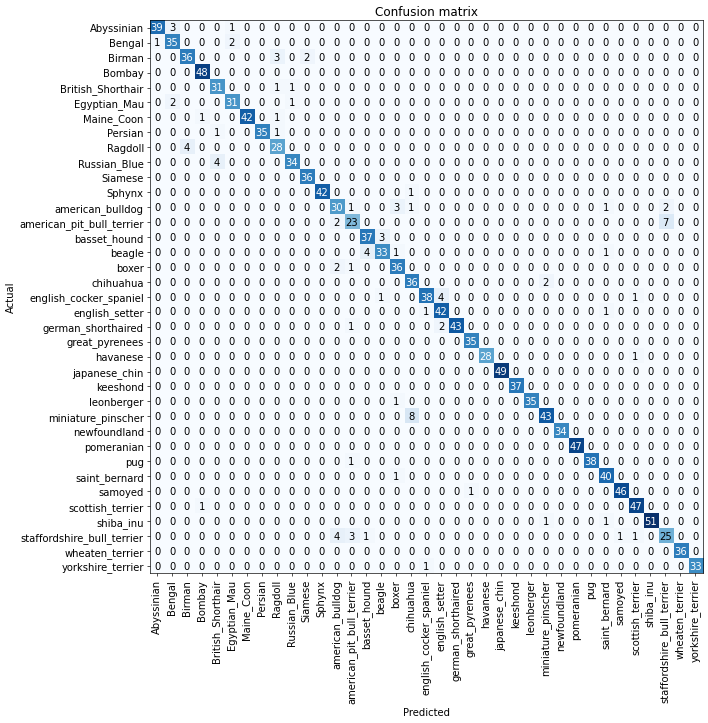

In [30]:
interp=ClassificationInterpretation.from_learner(learn)
interp.plot_confusion_matrix(figsize=(12,12),dpi=60)

In [31]:
interp.most_confused(min_val=5)

[('miniature_pinscher', 'chihuahua', 8),
 ('american_pit_bull_terrier', 'staffordshire_bull_terrier', 7)]

In [32]:
learn=vision_learner(dls,resnet34,metrics=error_rate)
learn.fine_tune(1,base_lr=0.1)

epoch,train_loss,valid_loss,error_rate,time
0,2.651703,3.700450,0.393099,00:33


epoch,train_loss,valid_loss,error_rate,time
0,2.837372,1.227462,0.359946,00:42


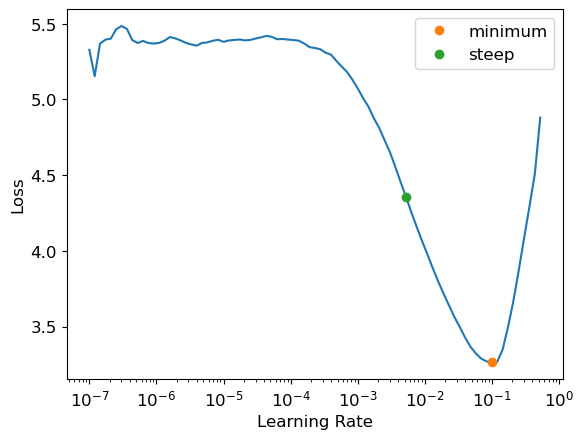

In [33]:
learn = vision_learner(dls, resnet34, metrics=error_rate)
lr_min,lr_steep = learn.lr_find(suggest_funcs=(minimum, steep))

In [34]:
print(f"Minimum/10: {lr_min:.2e}, steepest point: {lr_steep:.2e}")

Minimum/10: 1.00e-02, steepest point: 5.25e-03


In [35]:
learn = vision_learner(dls, resnet34, metrics=error_rate)
learn.fine_tune(2, base_lr=3e-3)
# finetune method fits one epoch by freezing the layers only unfreezing the last random layers
# then it unfreezes all the layers and trains on rest of the epochs

epoch,train_loss,valid_loss,error_rate,time
0,1.339910,0.333948,0.110284,00:33


epoch,train_loss,valid_loss,error_rate,time
0,0.545827,0.363487,0.118403,00:42
1,0.346069,0.218143,0.073072,00:42


In [36]:
learn = vision_learner(dls, resnet34, metrics=error_rate)
learn.fit_one_cycle(3, 3e-3)

# fit one cycle only unfreezes the last random layers

epoch,train_loss,valid_loss,error_rate,time
0,1.123720,0.297610,0.091340,00:34
1,0.523464,0.236508,0.079161,00:32
2,0.338846,0.216871,0.074425,00:33


In [37]:
learn.unfreeze()

SuggestedLRs(valley=3.630780702224001e-05)

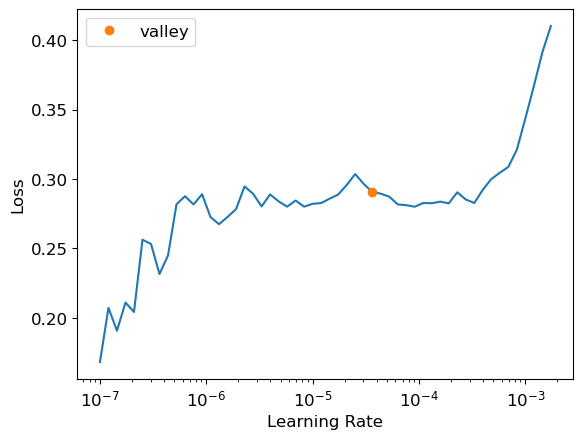

In [38]:
learn.lr_find()

In [39]:
learn.fit_one_cycle(6, lr_max=1e-5)

epoch,train_loss,valid_loss,error_rate,time
0,0.265948,0.201336,0.064953,00:42
1,0.245408,0.187346,0.060217,00:42
2,0.230235,0.185785,0.056157,00:42
3,0.206819,0.185120,0.060893,00:42
4,0.190472,0.178213,0.053451,00:42
5,0.182070,0.182041,0.056157,00:42


In [40]:
# discriminative learning rates
#use a lower learning rate for the early layers of the neural network, 
#and a higher learning rate for the later layers (and especially the randomly added layers).

In [42]:
learn = vision_learner(dls, resnet34, metrics=error_rate)
learn.fit_one_cycle(3, 3e-3)
learn.unfreeze()
learn.fit_one_cycle(12, lr_max=slice(1e-6,1e-4)) # we use a slice object here to determine the discriminative learning rates here.

epoch,train_loss,valid_loss,error_rate,time
0,1.148053,0.326057,0.107578,00:33
1,0.537868,0.231983,0.075101,00:34
2,0.343727,0.200906,0.067659,00:33


epoch,train_loss,valid_loss,error_rate,time
0,0.266865,0.194237,0.064276,00:42
1,0.242516,0.189825,0.066306,00:42
2,0.244193,0.182289,0.062923,00:42
3,0.213350,0.177111,0.061570,00:43
4,0.191212,0.179560,0.057510,00:43
5,0.177291,0.177307,0.058863,00:42
6,0.170399,0.176677,0.056834,00:42
7,0.142619,0.173799,0.056834,00:42
8,0.140085,0.173054,0.055480,00:42
9,0.134842,0.173174,0.053451,00:42


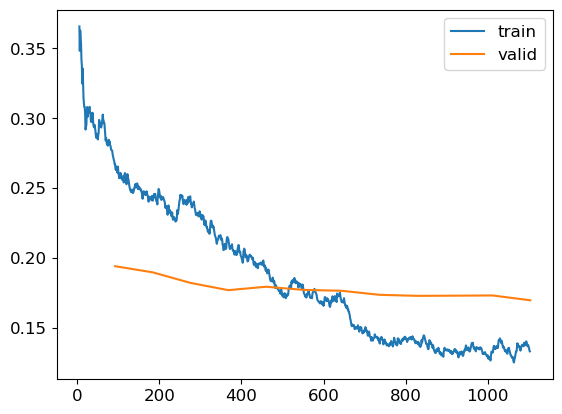

In [43]:
learn.recorder.plot_loss()

In [44]:
from fastai.callback.fp16 import *
learn = vision_learner(dls, resnet50, metrics=error_rate).to_fp16()
learn.fine_tune(6, freeze_epochs=3) # train for 3 epochs the last random layers and then unfreeze for the remaining layers.

/home/imtiaz/mambaforge/lib/python3.9/site-packages/torchvision/models/_utils.py:223: UserWarning: Arguments other than a weight enum or `None` for 'weights' are deprecated since 0.13 and will be removed in 0.15. The current behavior is equivalent to passing `weights=ResNet50_Weights.IMAGENET1K_V1`. You can also use `weights=ResNet50_Weights.DEFAULT` to get the most up-to-date weights.
  warnings.warn(msg)
Downloading: "https://download.pytorch.org/models/resnet50-0676ba61.pth" to /home/imtiaz/.cache/torch/hub/checkpoints/resnet50-0676ba61.pth


  0%|          | 0.00/97.8M [00:00<?, ?B/s]

epoch,train_loss,valid_loss,error_rate,time
0,1.291031,0.258020,0.081191,00:46
1,0.586747,0.268781,0.084574,00:46
2,0.427013,0.257232,0.080514,00:45


epoch,train_loss,valid_loss,error_rate,time
0,0.270140,0.245072,0.080514,00:58
1,0.310623,0.310137,0.092693,00:58
2,0.269964,0.277360,0.080514,00:57
3,0.145336,0.198507,0.060217,00:57
4,0.094342,0.181296,0.052774,00:57
5,0.050220,0.167542,0.047361,00:57


#### chapter 6

In [1]:
from fastai.vision.all import *
path=untar_data(URLs.PASCAL_2007)

In [2]:
df=pd.read_csv(path/'train.csv')
df.head()

,fname,labels,is_valid
0,000005.jpg,chair,True
1,000007.jpg,car,True
2,000009.jpg,horse person,True
3,000012.jpg,car,False
4,000016.jpg,bicycle,True


In [3]:
df.iloc[:,0]

0       000005.jpg
1       000007.jpg
2       000009.jpg
3       000012.jpg
4       000016.jpg
           ...    
5006    009954.jpg
5007    009955.jpg
5008    009958.jpg
5009    009959.jpg
5010    009961.jpg
Name: fname, Length: 5011, dtype: object

In [5]:
df.iloc[0]

fname       000005.jpg
labels           chair
is_valid          True
Name: 0, dtype: object

In [16]:
df.labels.value_counts()

person                                                408
car                                                   376
bird                                                  293
cat                                                   242
dog                                                   234
                                                     ... 
boat pottedplant chair diningtable person sofa dog      1
bottle diningtable person chair                         1
car bird                                                1
car person dog bus                                      1
sofa bottle person pottedplant                          1
Name: labels, Length: 473, dtype: int64

In [17]:
df.shape

(5011, 3)

In [4]:
dblock=DataBlock()

In [6]:
dsets=dblock.datasets(df)

In [7]:
len(dsets.train),len(dsets.valid)

(4009, 1002)

In [8]:
x,y = dsets.train[0]
x,y

(fname       006612.jpg
 labels      person cow
 is_valid         False
 Name: 3329, dtype: object,
 fname       006612.jpg
 labels      person cow
 is_valid         False
 Name: 3329, dtype: object)

In [9]:
x['fname']

'006612.jpg'

In [11]:
dblock=DataBlock(get_x=lambda r : r['fname'],get_y=lambda r : r['labels'])
dsets=dblock.datasets(df)
dsets.train[0]

('004935.jpg', 'person horse')

In [12]:
def get_x(r): return r['fname']
def get_y(r): return r['labels']

In [13]:
dblock=DataBlock(get_x=get_x,get_y=get_y)
dsets=dblock.datasets(df)
dsets.train[0]

('002718.jpg', 'bird')

In [14]:
def get_x(r): return path/'train'/r['fname']
def get_y(r): return r['labels'].split(" ")
dblock=DataBlock(get_x=get_x,get_y=get_y)
dsets=dblock.datasets(df)
dsets.train[0]

(Path('/home/imtiaz/.fastai/data/pascal_2007/train/007503.jpg'), ['aeroplane'])

In [15]:
dblock=DataBlock(blocks=[ImageBlock,MultiCategoryBlock],
                get_x=get_x,get_y=get_y)
dsets=dblock.datasets(df)
dsets.train[0]

(PILImage mode=RGB size=500x375,
 TensorMultiCategory([0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 1., 0.,
                      0., 0., 0., 0., 0.]))

In [21]:
idxs=torch.where(dsets.train[0][1]==1.)[0]
idxs

TensorMultiCategory([13])

In [22]:
dsets.train.vocab[idxs]

(#1) ['motorbike']

In [23]:
dsets.train.vocab

['aeroplane', 'bicycle', 'bird', 'boat', 'bottle', 'bus', 'car', 'cat', 'chair', 'cow', 'diningtable', 'dog', 'horse', 'motorbike', 'person', 'pottedplant', 'sheep', 'sofa', 'train', 'tvmonitor']

In [24]:
def splitter(df):
    train=df.index[~df.is_valid].tolist()
    valid=df.index[df.is_valid].tolist()
    return train,valid

dblock=DataBlock(blocks=(ImageBlock,MultiCategoryBlock),
                splitter=splitter,
                get_x=get_x,
                get_y=get_y)
dsets=dblock.datasets(df)
dsets.train[0]

(PILImage mode=RGB size=500x333,
 TensorMultiCategory([0., 0., 0., 0., 0., 0., 1., 0., 0., 0., 0., 0., 0., 0., 0.,
                      0., 0., 0., 0., 0.]))

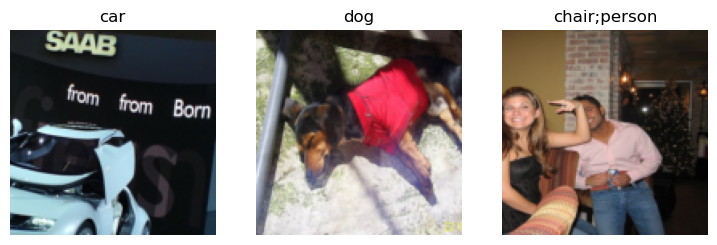

In [26]:
dblock=DataBlock(blocks=(ImageBlock,MultiCategoryBlock),
                splitter=splitter,
                get_x=get_x,
                get_y=get_y,
                item_tfms=RandomResizedCrop(128,min_scale=0.35))
dls=dblock.dataloaders(df)
dls.show_batch(nrows=1,ncols=3)

In [28]:
learn=vision_learner(dls,resnet18)

In [30]:
x,y=to_cpu(dls.train.one_batch())

In [31]:
activs=learn.model(x)
activs.shape

torch.Size([64, 20])

In [32]:
def binary_cross_entropy(inputs,targets):
    inputs=inputs.sigmoid()
    return -torch.where(targets==1, inputs, 1-inputs).log().mean()